In [171]:
!pip install PrettyTable

  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp37-none-any.whl size=13706 sha256=fcaec85f9c59e54e4cf7f1f1ef6f7603dadf420e47b4ecaace8882a8e028d9d1
  Stored in directory: C:\Users\Bharath\AppData\Local\pip\Cache\wheels\80\34\1c\3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built PrettyTable


In [414]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [415]:
X,y = load_boston(return_X_y=True)

In [416]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [417]:
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [418]:
x_train[0]

array([1.50234e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
       5.30400e+00, 9.73000e+01, 2.10070e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 3.49480e+02, 2.49100e+01])

In [419]:

min_max_scaler = preprocessing.MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)


In [420]:
print(x_train.shape)
x_train[0]

(404, 13)


array([0.16876276, 0.        , 0.64296296, 0.        , 0.47119342,
       0.29306488, 0.97219361, 0.0883067 , 1.        , 0.91412214,
       0.80851064, 0.88042766, 0.63962472])

In [421]:
clf = SGDRegressor(random_state = 42)

clf.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [422]:
y_predict_test = clf.predict(x_test)
y_predict_train = clf.predict(x_train)

In [423]:
mean_squared_error(y_test,y_predict_test)

26.793371711592137

In [424]:
mean_squared_error(y_train,y_predict_train)

23.086294443180105

## Custom linear regression and SGD:

In [425]:
def calculate_loss(w,b,y,x):
    
    sum = 0
    for i in range(len(y)):
        
        sum += (y[i] - np.dot(w.T,x[i]) - b)*(y[i] - np.dot(w.T,x[i]) - b)
        
    return sum
        

In [426]:
def f_w_derivative(w,b,y,x):
    
    sum = np.zeros((13,))
    for i in range(len(y)):
        
        sum += (-2*x[i])*(y[i] - float(np.dot(w.T,x[i])) - b)
        
    return sum

In [427]:
def f_b_derivative(w,b,y,x):
    sum = 0
    
    for i in range(len(y)):
        
        sum += (-2)*(y[i] - np.dot(w.T, x[i]) - b)
        
    return sum

In [428]:
w_old =  np.zeros((13,)) 
b_old = 0  
r = 0.001
n_itr = 0
batch_size = 100
while(n_itr <= 1000 ):
    
    index = np.random.choice(x_train.shape[0] ,batch_size, replace=False)
    x = x_train[index,:]
    y = y_train[index]
    
    
    b_derivative = f_b_derivative(w_old , b_old, y , x)
    
    w_derivative = f_w_derivative(w_old , b_old, y , x)
    
    
    
    w_new = w_old - r * w_derivative

    b_new = b_old - r*b_derivative
    

    
    loss = calculate_loss(w_new,b_new,y,x)
    w_old = w_new
    b_old = b_new
    n_itr += 1
    
    if(n_itr%100 == 0):
        #r = r/2
        print('iteration:', n_itr, 'loss:', loss, 'learning rate:',r)
    

iteration: 100 loss: 4256.343041777181 learning rate: 0.001
iteration: 200 loss: 2713.4027912458196 learning rate: 0.001
iteration: 300 loss: 2446.7192276956766 learning rate: 0.001
iteration: 400 loss: 1768.8337816042097 learning rate: 0.001
iteration: 500 loss: 1176.8249619286178 learning rate: 0.001
iteration: 600 loss: 1648.6358892506812 learning rate: 0.001
iteration: 700 loss: 3239.4471701987122 learning rate: 0.001
iteration: 800 loss: 2690.1850454677 learning rate: 0.001
iteration: 900 loss: 1409.383368081637 learning rate: 0.001
iteration: 1000 loss: 2833.6686209639056 learning rate: 0.001


In [429]:
y_pred_test = []

for i in range(len(y_test)):
    
    y_pred_test.append(float(np.dot(w_new.T,x_test[i])) + b_new)

In [430]:
y_pred_train = []

for i in range(len(y_train)):
    
    y_pred_train.append(float(np.dot(w_new.T,x_train[i])) + b_new)

In [431]:
mean_squared_error(y_test,y_pred_test)

26.40129563798958

In [432]:
mean_squared_error(y_train,y_pred_train)

23.123286297740073

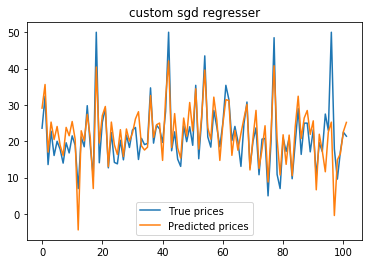

In [437]:
import matplotlib.pyplot as plt

plt.plot(range(len(y_test)), y_test, label = 'True prices')
plt.plot(range(len(y_pred_test)), y_pred_test, label = 'Predicted prices')
plt.title('custom sgd regresser')
plt.legend()
plt.show()

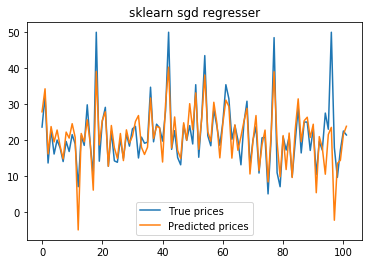

In [438]:
plt.plot(range(len(y_test)), y_test, label = 'True prices')
plt.plot(range(len(y_predict_test)), y_predict_test, label= 'Predicted prices')
plt.title('sklearn sgd regresser')
plt.legend()
plt.show()

## Weights comparison

In [435]:

from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = ["weights","sklearn weights", "custom sgd weights"]
for i in range(len(w_new)):
    x.add_row(["W_"+str(i),clf.coef_[i], w_new[i]])

x.add_row(["intercept", float(clf.intercept_), b_new])


print(x)

+-----------+----------------------+---------------------+
|  weights  |   sklearn weights    |  custom sgd weights |
+-----------+----------------------+---------------------+
|    W_0    |  -4.076596856111075  |  -6.219559765797287 |
|    W_1    |  1.2079191025755895  |  1.5439000018035811 |
|    W_2    | -0.08620181176076841 |  1.0843964333953742 |
|    W_3    |  3.2479205192554836  |  2.8360001268087505 |
|    W_4    | -3.1878327638763175  |  -5.543706991697299 |
|    W_5    |  24.528390664016403  |  25.01307608203157  |
|    W_6    |  1.1499100662040393  | 0.22128964323114475 |
|    W_7    |  -6.077984859141772  |  -10.48684757725802 |
|    W_8    |  2.9489849865713307  |  4.259749262737013  |
|    W_9    | -2.8094607126540985  |  -3.920789765417196 |
|    W_10   |  -7.325534221049525  |  -7.583463069353065 |
|    W_11   |  6.724615383076588   |  6.051195988188064  |
|    W_12   |  -17.18657369477348  | -17.224815908044057 |
| intercept |  15.783217161311384  |  19.45236018147185 

In [436]:
# code borrowed from below site
# http://zetcode.com/python/prettytable/


from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = ["model", "train_MSE","test_MSE"]

x.add_row(["sklearn SGD regresser", mean_squared_error(y_train,y_predict_train),mean_squared_error(y_test,y_predict_test)])
x.add_row(["custom linear regression", mean_squared_error(y_train,y_pred_train), mean_squared_error(y_test,y_pred_test)])


print(x)

+--------------------------+--------------------+--------------------+
|          model           |     train_MSE      |      test_MSE      |
+--------------------------+--------------------+--------------------+
|  sklearn SGD regresser   | 23.086294443180105 | 26.793371711592137 |
| custom linear regression | 23.123286297740073 | 26.40129563798958  |
+--------------------------+--------------------+--------------------+


### Observations:

> with increasing number of iterations we can get results similar to sklearn implementation